# Learning from Imbalanced Datasets
 Partially adapted from "Machine Learning Mastery".


This course is for developers that may know some applied machine learning. Maybe you know how to work through a predictive modeling problem end-to-end, or at least most of the main steps, with popular tools.

The lessons in this course do assume a few things about you, such as:

- You know your way around basic Python for programming.
- You may know some basic NumPy for array manipulation.
- You may know some basic scikit-learn for modeling.

You do NOT need to be:
- A math wiz!
- A machine learning expert!

This crash course will take you from a developer who knows a little machine learning to a developer who can navigate an imbalanced classification project.

## Lesson 01: Challenge of Imbalanced Classification

In this lesson, you will discover the challenge of imbalanced classification problems.

*Imbalanced classification problems* pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class.

This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

- Majority Class: More than half of the examples belong to this class, often the negative or normal case.
- Minority Class: Less than half of the examples belong to this class, often the positive or abnormal case.

A classification problem may be a little skewed, such as if there is a slight imbalance. Alternately, the classification problem may have a severe imbalance where there might be hundreds or thousands of examples in one class and tens of examples in another class for a given training dataset.

- Slight Imbalance. Where the distribution of examples is uneven by a small amount in the training dataset (e.g. 4:6).
- Severe Imbalance. Where the distribution of examples is uneven by a large amount in the training dataset (e.g. 1:100 or more).

Many of the classification predictive modeling problems that we are interested in solving in practice are imbalanced.

As such, it is surprising that imbalanced classification does not get more attention than it does.



### Your task
For this lesson, you must list five general examples of problems that inherently have a class imbalance.

* Fraud detection.
* Healthcare system.
* NPL (feeling detection on social media).

In the next lesson, you will discover how to develop an intuition for skewed class distributions.

## Lesson 02: Intuition for Imbalanced Data
In this lesson, you will discover how to develop a practical intuition for imbalanced classification datasets.

A challenge for beginners working with imbalanced classification problems is what a specific skewed class distribution means. For example, what is the difference and implication for a 1:10 vs. a 1:100 class ratio?

The `make_classification()` scikit-learn function can be used to define a synthetic dataset with a desired class imbalance. The **“weights”** argument specifies the ratio of examples in the negative class, e.g. [0.99, 0.01] means that 99 percent of the examples will belong to the majority class, and the remaining 1 percent will belong to the minority class.

In [1]:
from sklearn.datasets import make_classification

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.95], flip_y=0, class_sep=0.8, random_state=250)

Here we define the WEIGHTS for the weights of the mayority class.

Once defined, we can summarize the class distribution using a `Counter` object to get an idea of exactly how many examples belong to each class.

In [2]:
from collections import Counter

# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 9500, 1: 500})


We can also create a scatter plot of the dataset because there are only two input variables. The dots can then be colored by each class. This plot provides a visual intuition for what exactly a 99 percent vs. 1 percent majority/minority class imbalance looks like in practice.

The complete example of creating and summarizing an imbalanced classification dataset is listed below.

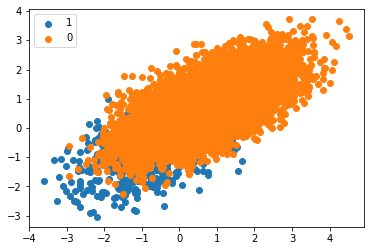

In [3]:
# plot imbalanced classification problem
from matplotlib import pyplot
from numpy import where

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Lesson 03: Evaluate Imbalanced Classification Models
In this lesson, you will discover how to evaluate models on imbalanced classification problems.

Prediction accuracy is the most common metric for classification tasks, although it is inappropriate and potentially dangerously misleading when used on imbalanced classification tasks.

The reason for this is because if 98 percent of the data belongs to the negative class, you can achieve 98 percent accuracy on average by simply predicting the negative class all the time, achieving a score that naively looks good, but in practice has no skill.

Instead, alternate performance metrics must be adopted.

Popular alternatives are the precision and recall scores that allow the performance of the model to be considered by focusing on the minority class, called the positive class.

- Precision calculates the ratio of the number of correctly predicted positive examples divided by the total number of positive examples that were predicted. Maximizing the precision will minimize the false positives:

  - $Precision = \frac{TruePositives}{TruePositives + FalsePositives}$

- Recall predicts the ratio of the total number of correctly predicted positive examples divided by the total number of positive examples that could have been predicted. Maximizing recall will minimize false negatives:

  - $Recall = \frac{TruePositives}{TruePositives + FalseNegatives}$

- The performance of a model can be summarized by a single score that averages both the precision and the recall, called the F-Measure. Maximizing the F-Measure will maximize both the precision and recall at the same time:

  - $F-measure = \frac{(2 \cdot Precision \cdot Recall)}{Precision + Recall}$

The example below fits a logistic regression model on an imbalanced classification problem and calculates the accuracy, which can then be compared to the precision, recall, and F-measure.

In [4]:
# evaluate imbalanced classification model with different metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, stratify=y)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.961
Precision: 0.733
Recall: 0.330
F-measure: 0.455


Aquí vemos que la precisión es muy alta porque hay un número bajo de falsos positivos pero sin embargo no se obtiene buena métrica de recall

## Lesson 04: Undersampling the Majority Class
In this lesson, you will discover how to undersample the majority class in the training dataset.

A simple approach to using standard machine learning algorithms on an imbalanced dataset is to change the training dataset to have a more balanced class distribution.

This can be achieved by deleting examples from the majority class, referred to as “undersampling.” A possible downside is that examples from the majority class that are helpful during modeling may be deleted.

The `imbalanced-learn` library provides many examples of undersampling algorithms. This library can be installed easily using pip; for example:

In [5]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


A fast and reliable approach is to randomly delete examples from the majority class to reduce the imbalance to a ratio that is less severe or even so that the classes are even.

The example below creates a synthetic imbalanced classification data, then uses `RandomUnderSampler` class to change the class distribution from 1:100 minority to majority classes to the less severe 1:2.

In [6]:
# example of undersampling the majority class
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV


# recall initial class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_under))

Counter({0: 9500, 1: 500})
Counter({0: 1000, 1: 500})


El ratio nos indica el número de elementos que vamos a tener de la clase mayoritaria en comparación con la clase minoritaria.

### Your Task
For this lesson, you must run the example and note the change in the class distribution before and after undersampling the majority class.

Additionally, you may plot the resulting training data and, of course, check the performance of the simple logistic regressor.

For bonus points, try other undersampling ratios or even try other undersampling techniques provided by the `imbalanced-learn` library, and repeat the process. 



In the next lesson, you will discover how to oversample the minority class.



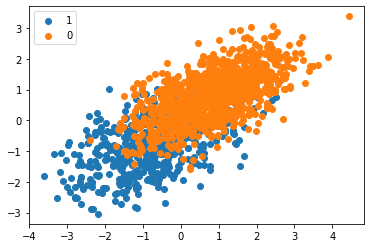

In [7]:
for label, _ in counter.items():
	row_ix = where(y_under == label)[0]
	pyplot.scatter(X_under[row_ix, 0], X_under[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [8]:
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X_under, y_under, test_size=0.5, stratify=y_under)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.849
Precision: 0.813
Recall: 0.712
F-measure: 0.759


## Lesson 05: Oversampling the Minority Class
In this lesson, you will discover how to oversample the minority class in the training dataset.

An alternative to deleting examples from the majority class is to add new examples from the minority class.

This can be achieved by simply duplicating examples in the minority class, but these examples do not add any new information. Instead, new examples from the minority can be synthesized using existing examples in the training dataset. These new examples will be “close” to existing examples in the feature space, but different in small but random ways.

The SMOTE algorithm is a popular approach for oversampling the minority class. This technique can be used to reduce the imbalance or to make the class distribution even.

The example below demonstrates using the SMOTE class provided by the imbalanced-learn library on a synthetic dataset. The initial class distribution is 1:100 and the minority class is oversampled to a 1:2 distribution.



In [9]:
# example of oversampling the minority class
from imblearn.over_sampling import SMOTE

# recall initial class distribution
print(Counter(y))
# define oversample strategy
oversample = SMOTE(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9500, 1: 500})
Counter({0: 9500, 1: 4750})


### Your Task
For this lesson, you must run the example and note the change in the class distribution before and after oversampling the minority class.

Additionally, you may plot the resulting training data and, of course, check the performance of the simple logistic regressor.

For bonus points, try other oversampling ratios, or even try other oversampling techniques provided by the `imbalanced-learn` library.



In the next lesson, you will discover how to combine undersampling and oversampling techniques.

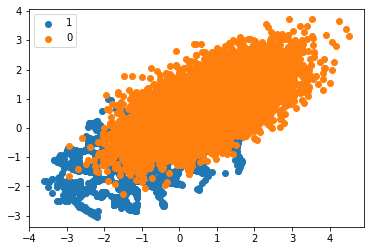

In [10]:
for label, _ in counter.items():
	row_ix = where(y_over == label)[0]
	pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [11]:
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X_over, y_over, test_size=0.5, stratify=y_over)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.858
Precision: 0.819
Recall: 0.737
F-measure: 0.776


## Lesson 06: Combine Data Undersampling and Oversampling
In this lesson, you will discover how to combine data undersampling and oversampling on a training dataset.

Data undersampling will delete examples from the majority class, whereas data oversampling will add examples to the minority class. These two approaches can be combined and used on a single training dataset.

Given that there are so many different data sampling techniques to choose from, it can be confusing as to which methods to combine. Thankfully, there are common combinations that have been shown to work well in practice; some examples include:

- Random Undersampling with SMOTE oversampling.
- Tomek Links Undersampling with SMOTE oversampling.
- Edited Nearest Neighbors Undersampling with SMOTE oversampling.

These combinations can be applied manually to a given training dataset by first applying one sampling algorithm, then another. Thankfully, the `imbalanced-learn` library provides implementations of common combined data sampling techniques.

The example below demonstrates how to use the SMOTEENN that combines both SMOTE oversampling of the minority class and Edited Nearest Neighbors undersampling of the majority class.



In [12]:
# example of both undersampling and oversampling
from imblearn.combine import SMOTEENN

# recall initial class distribution
print(Counter(y))
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5)
# fit and apply the transform
X_over, y_over = sample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9500, 1: 500})
Counter({0: 7738, 1: 3422})


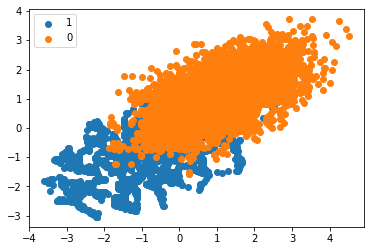

In [13]:
for label, _ in counter.items():
	row_ix = where(y_over == label)[0]
	pyplot.scatter(X_over[row_ix, 0], X_over[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [14]:
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X_over, y_over, test_size=0.5, stratify=y_over)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.938
Precision: 0.900
Recall: 0.898
F-measure: 0.899


### Your Task
For this lesson, you must run the example and note the change in the class distribution before and after the data sampling.

Additionally, you may plot the resulting training data and, of course, check the performance of the simple logistic regressor.

For bonus points, try other combined data sampling techniques or even try manually applying oversampling followed by undersampling on the dataset. For this purpose, you may take advantage of the `Pipeline` tool. 



In the next lesson, you will discover how to use cost-sensitive algorithms for imbalanced classification.

## Lesson 07: Cost-Sensitive Algorithms
In this lesson, you will discover how to use cost-sensitive algorithms for imbalanced classification.

Most machine learning algorithms assume that all misclassification errors made by a model are equal. This is often not the case for imbalanced classification problems, where missing a **positive** or **minority class** case is worse than incorrectly classifying an example from the negative or majority class.

Cost-sensitive learning is a subfield of machine learning that takes the costs of prediction errors (and potentially other costs) into account when training a machine learning model. Many machine learning algorithms can be updated to be cost-sensitive, where the model is penalized for misclassification errors from one class more than the other, such as the minority class.

The scikit-learn library provides this capability for a range of algorithms via the `class_weight` attribute specified when defining the model. A weighting can be specified that is inversely proportional to the class distribution.

If the class distribution was 0.99 to 0.01 for the majority and minority classes, then the `class_weight` argument could be defined as a dictionary that defines a penalty of 0.01 for errors made for the majority class and a penalty of 0.99 for errors made with the minority class, e.g. {0:0.01, 1:0.99}.

This is a useful heuristic and can be configured automatically by setting the `class_weight` argument to the string `‘balanced‘`.

The example below demonstrates how to define and fit a cost-sensitive logistic regression model on an imbalanced classification dataset.

In [15]:
# example of cost sensitive logistic regression for imbalanced classification

# define CS model
model = LogisticRegression(solver='liblinear', class_weight='balanced')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.932
Precision: 0.857
Recall: 0.936
F-measure: 0.895


In [16]:
# define CS model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
print('Accuracy: %.3f' % accuracy_score(testy, yhat))
print('Precision: %.3f' % precision_score(testy, yhat))
print('Recall: %.3f' % recall_score(testy, yhat))
print('F-measure: %.3f' % f1_score(testy, yhat))

Accuracy: 0.938
Precision: 0.900
Recall: 0.898
F-measure: 0.899


### Your Task
For this lesson, you must run the example and review the performance of the cost-sensitive model.

For bonus points, compare the performance to the cost-insensitive version of logistic regression.


This was the final lesson of the mini-course.

## The End!
### (Look How Far You Have Come)
You made it. Well done!

Take a moment and look back at how far you have come.

You discovered:

- The challenge of imbalanced classification is the lack of examples for the minority class and the difference in importance of classification errors across the classes.
- How to develop a spatial intuition for imbalanced classification datasets that might inform data preparation and algorithm selection.
- The failure of classification accuracy and how alternate metrics like precision, recall, and the F-measure can better summarize model performance on imbalanced datasets.
- How to delete examples from the majority class in the training dataset, referred to as data undersampling.
- How to synthesize new examples in the minority class in the training dataset, referred to as data oversampling.
- How to combine data oversampling and undersampling techniques on the training dataset, and common combinations that result in good performance.
-How to use cost-sensitive modified versions of machine learning algorithms to improve performance on imbalanced classification datasets.


## Activities to be carried out
Now it is your turn to check whether you have understood the nature of the imbalanced classification topic, and that you are able to address this issue properly. In order to do so, several activities are asked to test your skills. In particular, you must be able to:
1. Provide a simple comparison of the different methods used so far, just to check out which one seems to have a better behavior with the toy problem build until now. 
2. Select a proper imbalanced dataset and carry out a proper experimental study in order to improve the predictive performance. You decide which metric you want to optimise, but you must justify your decision. Since this task involves several actions, it will be described with more detail in the corresponding subsection below. 
3. Finally, you may consider to extend the previous task by applying a through analysis using different preprocessing mechanism, classification algorithms, and hyperparametrization in order to get the best possible result. This part is **optional**.  

In the corresponding sections, please do not hesitate to add more code and text blocks to make the structure and content clearer for the evaluation. 

### 1. Simple comparison for solutions in imbalanced classification

In this tutorial, you have checked the performance of different techniques for dealing with the skewed class distribution. Now it is time to carry out a local and global comparison among these, in order to check which one seems to provide a better performance. 

To this end, you should start with the baseline performance (no special method applied). Then, you must select among the undersampling approaches, which one seems to be more appropriate. Repeat the process with oversampling, and with hybrid approaches. You may also consider ensemble learning solutions. For cost-sensitive, you may also try "thresholding", by using the output probabilities and provide the *positive* or *negative* label using this: `y_pred = estimator.predict_proba(X_test)[:, 1] > .85`

Finally, create a **global comparison** among the different families (undersampling, oversampling, hybrid, cost-sensitive, ensemble). You can use *statistical* tests for this purpose, in order to have well-founded conclusions. 

As a suggestion, use **AUC** as default metric to ease the complete procedure, but you may also check out how the recognition of both classes change for each approach applied. 

You can also use as default imbalance ratio for preprocessing 1:1 or 1:2, or rather to check different values for the sampling ratio to observe whether there are significant differences among the results. 



#### Creation and plotting of the dataset

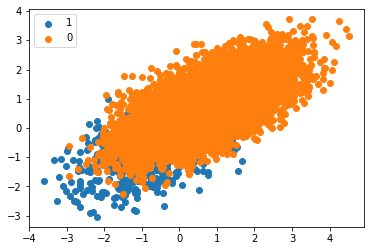

In [17]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Methods: Baseline, Undersampling, Oversampling, Combination, Cost-sensitive algorithms
df_results = []

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.95], flip_y=0, class_sep=0.8, random_state=250)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

#### Baseline

In [18]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
#print('ROC AUC: %.3f' % roc_auc_score(testy, yhat))
print(classification_report(testy,yhat))
df_results.append(
    {
        'Class':'Baseline',
        'ROC AUC':roc_auc_score(testy,yhat)
    }
)

print(df_results)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4750
           1       0.74      0.32      0.45       250

    accuracy                           0.96      5000
   macro avg       0.85      0.66      0.71      5000
weighted avg       0.95      0.96      0.95      5000

[{'Class': 'Baseline', 'ROC AUC': 0.6589473684210527}]


#### Undersampling, oversampling and hybrid approaches

In [19]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

# Undersampling methods
rd_under = RandomUnderSampler()
tomek = TomekLinks()
enn = EditedNearestNeighbours()

# Oversampling methods
rd_over = RandomOverSampler()
ada = ADASYN()
smt = SMOTE()

# Combine data undersampling and oversampling
smtenn = SMOTEENN()
smttmk = SMOTETomek()

# Algorithms
algs = [rd_under,tomek,enn,
        rd_over,ada,smt,
        smtenn,smttmk]
names = ['RandomUnder','TomekLinks','ENN',
         'RandomOver','ADASYN','SMOTE',
         'SMOTE-ENN','SMOTE-TOMEK']

nth = 0

for und in algs:
    pipe = Pipeline([('fit',und), ('clf',model)])
    pipe.fit(trainX, trainy)
    yhat = pipe.predict(testX)
    print(names[nth])
    print(classification_report(testy,yhat))
    df_results.append(
        {
            'Class':names[nth],
            'ROC AUC':roc_auc_score(testy,yhat)
        }
    )
    nth += 1

print(df_results)

RandomUnder
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4750
           1       0.21      0.85      0.34       250

    accuracy                           0.84      5000
   macro avg       0.60      0.84      0.62      5000
weighted avg       0.95      0.84      0.88      5000

TomekLinks
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4750
           1       0.68      0.34      0.46       250

    accuracy                           0.96      5000
   macro avg       0.82      0.67      0.72      5000
weighted avg       0.95      0.96      0.95      5000

ENN
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      4750
           1       0.53      0.52      0.53       250

    accuracy                           0.95      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.95      0.95      0.95    

* Undersampling: mientras que el ENN y TomekLinks presentan un equilibrio entre la precisión y la sensibilidad, el RandomUndersampling tiene un valor alto para la sensibilidad y bajo para la precisión. El último de los tres es el que tiene mejor valor para el roc auc.
* Oversampling: para todos ellos la precisión es baja y la sensibilidad es alta. Todos muestran un valor similar en roc auc.
* Combinación de undersampling y oversampling: devuelven valores similares tanto para la precisión como para la sensibilidad. El valor roc auc es el mismo debido a que ambos aplican smote antes de la técnicas de undersampling, el cual ya obtiene un valor muy alto.

#### Cost-sensitive algorithms

In [20]:
# Adjust threshold

model = LogisticRegression(solver='liblinear', class_weight='balanced')
# fit model
model.fit(trainX, trainy)
# predict on test set
probs = [0.5, 0.75, 0.85]
for pr in probs:
    yhat = model.predict_proba(testX)[:, 1] > pr
    print("Probabilidad > %.2f" % pr)
    print(classification_report(testy,yhat))
    df_results.append(
        {
            'Class':pr,
            'ROC AUC':roc_auc_score(testy,yhat)
        }
    )

print(df_results)

Probabilidad > 0.50
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4750
           1       0.22      0.86      0.35       250

    accuracy                           0.84      5000
   macro avg       0.61      0.85      0.63      5000
weighted avg       0.95      0.84      0.88      5000

Probabilidad > 0.75
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      4750
           1       0.38      0.67      0.49       250

    accuracy                           0.93      5000
   macro avg       0.68      0.81      0.72      5000
weighted avg       0.95      0.93      0.94      5000

Probabilidad > 0.85
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4750
           1       0.49      0.54      0.52       250

    accuracy                           0.95      5000
   macro avg       0.73      0.76      0.75      5000
weighted avg  

Conforme se aumenta el threshold aumenta la precisión y baja la sensibilidad, empeorando la tasa de acierto final en el roc auc.

#### Ensembles

In [21]:
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import RUSBoostClassifier

model = LogisticRegression(solver='liblinear')
rf = BalancedBaggingClassifier(base_estimator=model)
rus = RUSBoostClassifier(base_estimator=model)
algs = [rf,rus]
names = ['BalancedBagging','RUSBoost']
nth = 0

for und in algs:
    pipe = und
    pipe.fit(trainX, trainy)
    yhat = pipe.predict(testX)
    print(names[nth])
    print(classification_report(testy,yhat))
    df_results.append(
        {
            'Class':names[nth],
            'ROC AUC':roc_auc_score(testy,yhat)
        }
    )
    nth += 1

print(df_results)

BalancedBagging
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      4750
           1       0.21      0.86      0.34       250

    accuracy                           0.83      5000
   macro avg       0.60      0.84      0.62      5000
weighted avg       0.95      0.83      0.88      5000

RUSBoost
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      4750
           1       0.21      0.85      0.34       250

    accuracy                           0.83      5000
   macro avg       0.60      0.84      0.62      5000
weighted avg       0.95      0.83      0.88      5000

[{'Class': 'Baseline', 'ROC AUC': 0.6589473684210527}, {'Class': 'RandomUnder', 'ROC AUC': 0.8418947368421053}, {'Class': 'TomekLinks', 'ROC AUC': 0.6677894736842104}, {'Class': 'ENN', 'ROC AUC': 0.7497894736842106}, {'Class': 'RandomOver', 'ROC AUC': 0.8477894736842105}, {'Class': 'ADASYN', 'ROC AUC': 0.840210526315789

Tanto el BalancedBagging (basado en árboles de decisión) como el RUSBoost (basado en AdaBoost) muestran valores muy parecidos tanto para la precisión como para la sensibilidad. Para el roc auc, el BalancedBagging obtiene una pequeña mejora (~ 0.0001).

#### Comparison of algorithms

,Class,ROC AUC
8,SMOTE-TOMEK,0.848211
4,RandomOver,0.847789
9,0.5,0.847789
6,SMOTE,0.847579
12,BalancedBagging,0.844526
7,SMOTE-ENN,0.843895
1,RandomUnder,0.841895
13,RUSBoost,0.840842
5,ADASYN,0.840211
10,0.75,0.807474


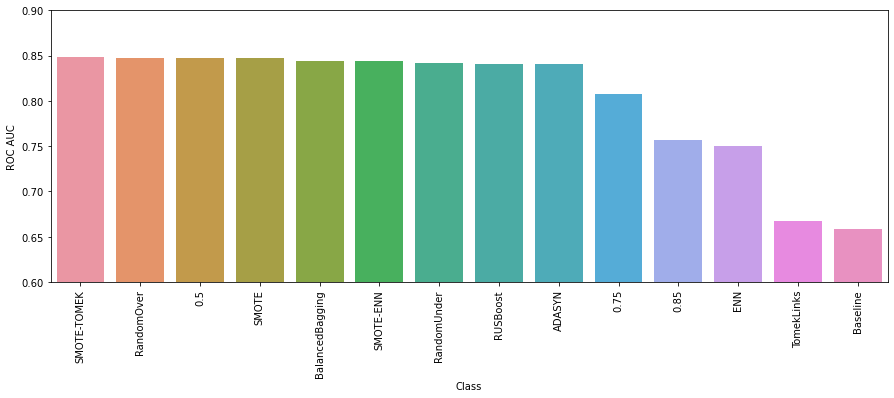

In [22]:
df_results = pd.DataFrame(df_results)
df_results.sort_values(by='ROC AUC', ascending=False, inplace=True)
display(df_results)
pyplot.figure(figsize=(15,5))

ax = sns.barplot(data=df_results, x='Class', y='ROC AUC')
labels=ax.get_xticklabels()
ax.set_xticklabels(labels=labels,rotation=90)
ax.set_ylim(0.60,0.9)
pyplot.show()

Para el estudio entre los diferentes algoritmos se elige el área debajo de la curva (i.d. roc auc) porque es un buen estadístico para comparar modelos debido a su similitud con el test de Wilcoxon. 

Los mejores valores obtenidos para este estadístico los obtienen los métodos ensemble, seguidos de los métodos combinatorios y los métodos basados en oversampling con una diferencia leve. El método de random undersampling está entre los mejores candidatos aunque no es un buen reflejo de los algoritmos de undersampling debido a la componente de azar que posee. Para los métodos basados en cost-sensitive vemos que solo el threshold menor a 0.5 es el que obtiene un valor similar a los mejores algoritmos. Los algoritmos basados en undersampling no mejoran de forma significativa respecto al algoritmo base.

### 2. Case study on imbalanced classification
You must select a problem between these two in order to carry out a proper study:
- Credit fraud classification (w. PCA transformed variables): https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud 
- Fetal health clasification (classes 2 and 3 must be joined for binary classifcation): https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification 

The first step is obviously to carry out a global EDA to know the characteristics of the problem. To do so, you must follow the recommendations made in previous subjects of the Master. 

Next, you must decide which performance metric you want to optimise. The decision depends on the nature of the problem, so that you must justify which one is better suited for it. 

Then, select a few classification methods in order to have several paradigms over the same problem. 

Finally, you must apply different techniques for addressing the class imbalance. The previous study (part 1) might provided you a clue on which ones are preferable for the task. 

Do not forget to describe all your steps and to write down a proper analysis of the results you are obtaining, which may lead you to take the decision on which methodology is the one finally selected to solve the problem. 


En la página de Kaggle se puede ver la siguiente recomendación: Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Por tanto, usaremos la métrica AUPRC como en el caso del ejercicio anterior.

In [23]:
import numpy as np
credit = pd.read_csv('creditcard.csv', header=0)
credit.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Este conjunto de datos tiene 29 variables transformadas por PCA y la etiqueta de clase. También podemos ver que no tiene valores perdidos.

Representamos el conjunto de forma gráfica para ver el solapamiento de las clases.

In [24]:
X = credit.drop(columns='Class')
y = credit['Class']
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 492})


In [25]:
import functools
sum_count = functools.reduce(lambda ac,k: ac+counter[k], counter, 0)
print(f"Non frauds: {counter[0]/sum_count}, Frauds: {counter[1]/sum_count}")

Non frauds: 0.9982725143693799, Frauds: 0.001727485630620034


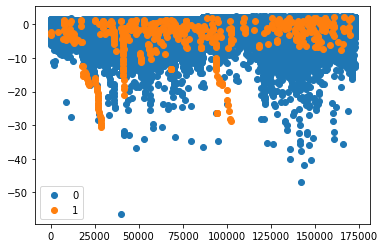

In [26]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

La primera aproximación es la eliminación de outliers de la clase negativa.

In [27]:
from sklearn.ensemble import IsolationForest
out_det = credit.loc[credit['Class'] == 0]
out_det = out_det.drop(columns='Class')
model=IsolationForest(n_estimators=300, max_samples='auto', contamination='auto', max_features=1.0)
model.fit(out_det)

IsolationForest(n_estimators=300)

El valor -1 para la columna anomaly indica la presencia de una anomalía, mientras que el valor 1 representa un dato normal. 

In [28]:
scores=model.decision_function(out_det)
anomaly=model.predict(out_det)

out_det['scores']=scores
out_det['anomaly']=anomaly

out_det.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,scores,anomaly
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.107615,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.127819,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.028871,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.090370,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.107253,1
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.127821,1
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.115762,1
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.022237,1
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.093750,1
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.121279,1


Al eliminar los outliers, se eliminan menos del 4% de los elementos de la clase negativa.

In [29]:
anomalias = out_det.loc[out_det['anomaly'] == -1]
anomalias_idx = list(anomalias.index)
print(f"El número de anomalías es:{len(anomalias)}")
print(f"El porcentaje de anomalias extraido es:{len(anomalias)/credit.loc[credit['Class'] == 0].shape[0]}")

El número de anomalías es:11126
El porcentaje de anomalias extraido es:0.03913265216397306


El siguiente paso es eliminar los outliers en el conjunto inicial

In [30]:
credit_out = credit.drop(anomalias_idx, axis=0).reset_index(drop=True)

El conjunto generado tiene menos elementos para la clase negativa (después de eliminar los outliers) y conserva los elementos de las clase positiva.

In [31]:
X = credit_out.drop(columns='Class')
y = credit_out['Class']
counter = Counter(y)
print(counter)

Counter({0: 273189, 1: 492})


Volvemos a graficar la distribución de los puntos para ver la diferencia

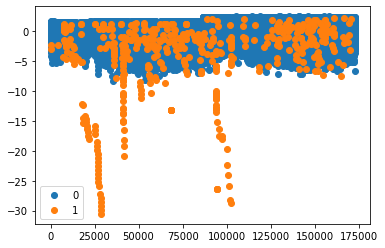

In [32]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X.iloc[row_ix, 0], X.iloc[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Como podemos ver se han eliminado gran parte de los elementos que estaban más separados del grupo principal.

#### Baseline

In [33]:
df_results = []

In [34]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, stratify=y)
# define model
model = LogisticRegression(solver='liblinear')
# fit model
model.fit(trainX, trainy)
# predict on test set
yhat = model.predict(testX)
# evaluate predictions
#print('ROC AUC: %.3f' % roc_auc_score(testy, yhat))
print(classification_report(testy,yhat))
df_results.append(
    {
        'Class':'Baseline',
        'ROC AUC':roc_auc_score(testy,yhat)
    }
)

print(df_results)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81957
           1       0.87      0.79      0.83       148

    accuracy                           1.00     82105
   macro avg       0.94      0.90      0.91     82105
weighted avg       1.00      1.00      1.00     82105

[{'Class': 'Baseline', 'ROC AUC': 0.8951665573476401}]


#### Undersampling, oversampling and hybrid approaches

In [35]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

# Undersampling methods
rd_under = RandomUnderSampler(sampling_strategy='majority')
tomek = TomekLinks(sampling_strategy='majority', n_jobs=-1)
enn = EditedNearestNeighbours(sampling_strategy='majority', n_jobs=-1)

# Oversampling methods
rd_over = RandomOverSampler(sampling_strategy='minority')
ada = ADASYN(sampling_strategy='minority', n_jobs=-1)
smt = SMOTE(sampling_strategy='minority', n_jobs=-1)

# Combine data undersampling and oversampling
smtenn = SMOTEENN(sampling_strategy='minority', n_jobs=-1)
smttmk = SMOTETomek(sampling_strategy='minority', n_jobs=-1)

# Algorithms
algs = [rd_under,tomek,enn,
        rd_over,ada,smt,
        smtenn,smttmk]
names = ['RandomUnder','TomekLinks','ENN',
         'RandomOver','ADASYN','SMOTE',
         'SMOTE-ENN','SMOTE-TOMEK']

nth = 0

for und in algs:
    pipe = Pipeline([('fit',und), ('clf',model)])
    pipe.fit(trainX, trainy)
    yhat = pipe.predict(testX)
    print(names[nth])
    print(classification_report(testy,yhat))
    df_results.append(
        {
            'Class':names[nth],
            'ROC AUC':roc_auc_score(testy,yhat)
        }
    )
    nth += 1

print(df_results)

RandomUnder
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     81957
           1       0.07      0.92      0.13       148

    accuracy                           0.98     82105
   macro avg       0.53      0.95      0.56     82105
weighted avg       1.00      0.98      0.99     82105

TomekLinks
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81957
           1       0.88      0.80      0.84       148

    accuracy                           1.00     82105
   macro avg       0.94      0.90      0.92     82105
weighted avg       1.00      1.00      1.00     82105

ENN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81957
           1       0.81      0.71      0.76       148

    accuracy                           1.00     82105
   macro avg       0.91      0.85      0.88     82105
weighted avg       1.00      1.00      1.00    

* Undersampling: mientras que el ENN y TomekLinks presentan un equilibrio entre la precisión y la sensibilidad, el RandomUndersampling tiene un valor alto para la sensibilidad y bajo para la precisión. El último de los tres es el que tiene mejor valor para el roc auc.
* Oversampling: para todos ellos la precisión es baja y la sensibilidad es alta. Todos muestran un valor similar en roc auc.
* Combinación de undersampling y oversampling: devuelven valores similares tanto para la precisión como para la sensibilidad. El valor roc auc es el mismo debido a que ambos aplican smote antes de la técnicas de undersampling, el cual ya obtiene un valor muy alto.

#### Cost-sensitive algorithms

In [36]:
# Adjust threshold

model = LogisticRegression(solver='liblinear', class_weight='balanced')
# fit model
model.fit(trainX, trainy)
# predict on test set
probs = [0.5, 0.75, 0.85]
for pr in probs:
    yhat = model.predict_proba(testX)[:, 1] > pr
    print("Probabilidad > %.2f" % pr)
    print(classification_report(testy,yhat))
    df_results.append(
        {
            'Class':pr,
            'ROC AUC':roc_auc_score(testy,yhat)
        }
    )

print(df_results)

Probabilidad > 0.50
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     81957
           1       0.06      0.92      0.12       148

    accuracy                           0.98     82105
   macro avg       0.53      0.95      0.55     82105
weighted avg       1.00      0.98      0.99     82105

Probabilidad > 0.75
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     81957
           1       0.16      0.91      0.27       148

    accuracy                           0.99     82105
   macro avg       0.58      0.95      0.63     82105
weighted avg       1.00      0.99      0.99     82105

Probabilidad > 0.85
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     81957
           1       0.22      0.90      0.36       148

    accuracy                           0.99     82105
   macro avg       0.61      0.95      0.68     82105
weighted avg  

Conforme se aumenta el threshold aumenta la precisión y se mantiene la sensibilidad. La tasa final en el roc auc no cambia.

#### Ensembles

In [37]:
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import RUSBoostClassifier

model = LogisticRegression(solver='liblinear')
rf = BalancedBaggingClassifier(base_estimator=model)
rus = RUSBoostClassifier(base_estimator=model)
algs = [rf,rus]
names = ['BalancedBagging','RUSBoost']
nth = 0

for und in algs:
    pipe = und
    pipe.fit(trainX, trainy)
    yhat = pipe.predict(testX)
    print(names[nth])
    print(classification_report(testy,yhat))
    df_results.append(
        {
            'Class':names[nth],
            'ROC AUC':roc_auc_score(testy,yhat)
        }
    )
    nth += 1

print(df_results)

BalancedBagging
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     81957
           1       0.07      0.93      0.13       148

    accuracy                           0.98     82105
   macro avg       0.54      0.96      0.56     82105
weighted avg       1.00      0.98      0.99     82105

RUSBoost
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     81957
           1       0.04      0.87      0.08       148

    accuracy                           0.97     82105
   macro avg       0.52      0.92      0.53     82105
weighted avg       1.00      0.97      0.98     82105

[{'Class': 'Baseline', 'ROC AUC': 0.8951665573476401}, {'Class': 'RandomUnder', 'ROC AUC': 0.9483133706567947}, {'Class': 'TomekLinks', 'ROC AUC': 0.9019294148645515}, {'Class': 'ENN', 'ROC AUC': 0.8545833114860166}, {'Class': 'RandomOver', 'ROC AUC': 0.9545515628004005}, {'Class': 'ADASYN', 'ROC AUC': 0.952120244993337

Tanto el BalancedBagging (basado en árboles de decisión) como el RUSBoost (basado en AdaBoost) muestran valores muy parecidos tanto para la precisión como para la sensibilidad. Para el roc auc, el BalancedBagging obtiene mejores resultados.

#### Comparison of algorithms

,Class,ROC AUC
7,SMOTE-ENN,0.956432
12,BalancedBagging,0.955424
8,SMOTE-TOMEK,0.955224
4,RandomOver,0.954552
6,SMOTE,0.952980
5,ADASYN,0.952120
10,0.75,0.951707
1,RandomUnder,0.948313
9,0.5,0.947417
11,0.85,0.946469


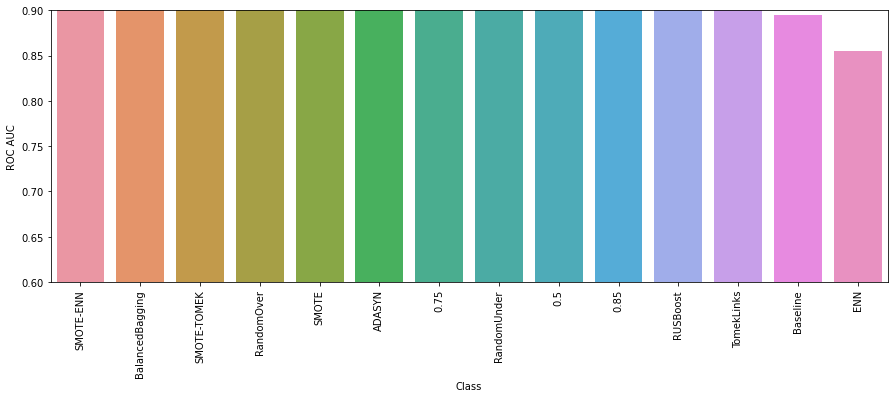

In [38]:
df_results = pd.DataFrame(df_results)
df_results.sort_values(by='ROC AUC', ascending=False, inplace=True)
display(df_results)
pyplot.figure(figsize=(15,5))

ax = sns.barplot(data=df_results, x='Class', y='ROC AUC')
labels=ax.get_xticklabels()
ax.set_xticklabels(labels=labels,rotation=90)
ax.set_ylim(0.60,0.9)
pyplot.show()

Los mejores valores obtenidos para este estadístico los obtienen los métodos combinatorios y el BalancedBagging, seguido de los métodos de oversampling, métodos basados en threshold y acabando con métodos de undersampling. De nuevo en este problema, el método de Random Undersampling actúa mejor que el resto de métodos basados en undersampling. 

En comparación con el problema planteado en la sección 1, se puede ver que los métodos combinatorios y basados en ensemble obtienen los mejores resultados, mientras que los algoritmos basados en undersampling no mejoran en gran medida el rendimiento del algoritmo base.

## Bibliography

Some advanced topics are covered in these links:

 https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18

 https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

 https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/

 https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

 https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/